# Классификаци данных MI на основе датасета BCI Competition VI dataset 2a



#   Подготовка данных





*   Подключение Google Drive с загруженным на него датасетом



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Установка библиотеки чтения и обработки данных ЭЭГ



In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.5 MB/s eta 0:00:00




*   Загрузка .gdf данных первого испытуемого и создания структуры данных, хранящей отчёты для каждой из проб



In [ ]:
import mne
%matplotlib inline
import numpy as np

# Путь к файлу
filename = "/content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf"

raw = mne.io.read_raw_gdf(filename)

# Переименовывание электродов в нужный формат
mne.rename_channels(raw.info,  {'EEG-Fz' : 'Fz',
                                'EEG-0' : 'FC3',
                                'EEG-1' : 'FC1',
                                'EEG-2' : 'FCz',
                                'EEG-3' : 'FC2',
                                'EEG-4' : 'FC4',
                                'EEG-5' : 'C5',
                                'EEG-C3' : 'C3',
                                'EEG-6' : 'C1',
                                'EEG-Cz' : 'Cz',
                                'EEG-7' : 'C2',
                                'EEG-C4' : 'C4',
                                'EEG-8' : 'C6',
                                'EEG-9' : 'CP3',
                                'EEG-10' : 'CP1',
                                'EEG-11' : 'CPz',
                                'EEG-12' : 'CP2',
                                'EEG-13' : 'CP4',
                                'EEG-14' : 'P1',
                                'EEG-Pz' : 'Pz',
                                'EEG-15' : 'P2',
                                'EEG-16' : 'POz'})

# Удаление каналов ЭОГ и применение монтажа

raw.drop_channels({'EOG-left', 'EOG-central', 'EOG-right'})
raw.info.set_montage('standard_1020')

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
>
['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']




*   Извлечение событий и эпох




In [ ]:
# Обнаружение событий из разметки файла

events, _ = mne.events_from_annotations(raw)
raw.load_data()

# Фильтрация исходных данных в диапазоне мю-ритма 8-13 Гц

raw.filter(8, 13, fir_design='firwin')

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False)

# Извлечение эпох длительностью 3с. Получаем 288 проб

tmin, tmax = 1., 4.
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished




*  Топографическая визуализация усреднённых данных по классам


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


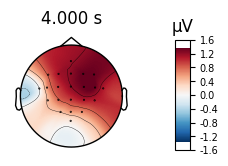

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


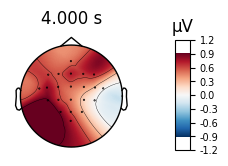

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


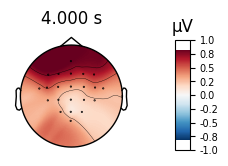

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


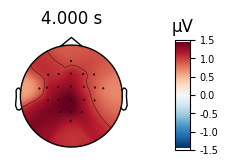

In [ ]:
fig1 = epochs['769'].average().plot_topomap(times=[4])
fig2 = epochs['770'].average().plot_topomap(times=[4])
fig3 = epochs['771'].average().plot_topomap(times=[4])
fig4 = epochs['772'].average().plot_topomap(times=[4])



*   Извлечение массива данных и меток для дальнешей подготовки тренировочных данных



In [ ]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1

data = epochs.get_data()

In [ ]:
from scipy.io import savemat

mdic = {"X": data, "Y": labels}
savemat("data.mat", mdic)



#   CSP





*   Импорт необходимых библиотек



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP



*   Создание пайплайна классификации на основе CSP, с использование 10-Fold кросс-валидации и классификаторов LDA и SVM



Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 22 dim * 3.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 22 dim * 4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 22 dim * 4.1e+09  max singular value)
    

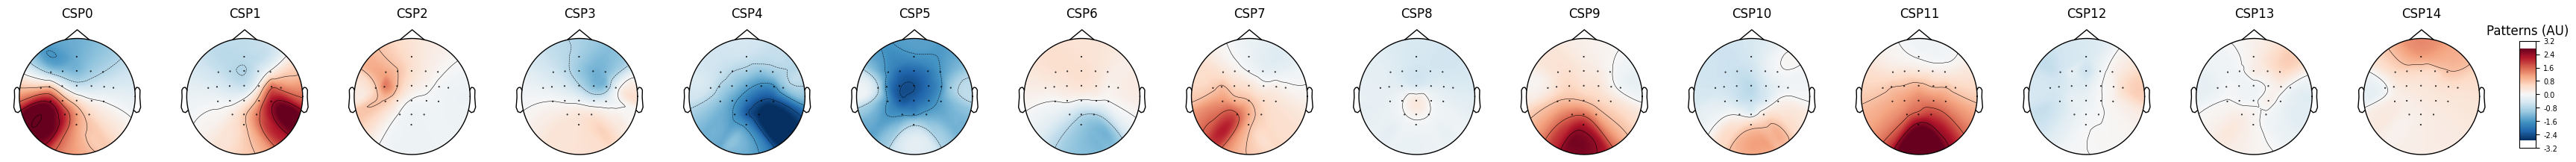

In [ ]:
# Определяем параметры кросс-валидации

scores = []
epochs_train = epochs.copy()
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()

cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Определение классификатора

lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=15, reg=None, log=True, norm_trace=False)

# Применение пайплайна для обучения и классификации

clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_predict(clf, epochs_data_train, labels, cv=10)



# Вывод результатов

class_balance = np.mean(labels == labels[0])

print("Classification accuracy: %f" % (np.mean(scores)))

conf_mat = confusion_matrix(scores, labels)


# Построение шаблонов CSP

csp.fit_transform(epochs_data, labels)

fig = csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)



*   Получение точности классификации



In [ ]:
mean_of_conf_matrix_arrays = conf_mat

In [ ]:
mean_of_conf_matrix_arrays

array([[41, 13,  4,  0],
       [25, 58,  2,  0],
       [ 4,  1, 47, 22],
       [ 2,  0, 19, 50]])

In [ ]:
mean_of_conf_matrix_arrays[0]

array([41, 13,  4,  0])

In [ ]:
np.sum(mean_of_conf_matrix_arrays[0])

58

In [ ]:
np.round(mean_of_conf_matrix_arrays[0]/np.sum(mean_of_conf_matrix_arrays[0]), 2)

array([0.71, 0.22, 0.07, 0.  ])

In [ ]:
result_conf = np.array([])

In [ ]:
result_conf = []
for i in range(len(mean_of_conf_matrix_arrays)):
  result_conf.append(np.round(mean_of_conf_matrix_arrays[i]/np.sum(mean_of_conf_matrix_arrays[i]), 2))

In [ ]:
result_conf

[array([0.71, 0.22, 0.07, 0.  ]),
 array([0.29, 0.68, 0.02, 0.  ]),
 array([0.05, 0.01, 0.64, 0.3 ]),
 array([0.03, 0.  , 0.27, 0.7 ])]

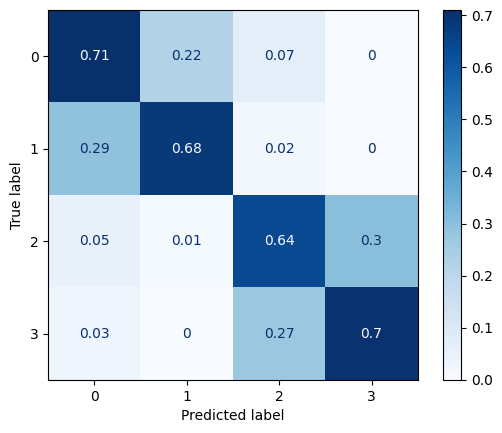

In [ ]:
a = np.array(result_conf)
disp = ConfusionMatrixDisplay(confusion_matrix=a)
fig = disp.plot(cmap=plt.cm.Blues)

In [ ]:
scores

array([3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 4, 1, 1, 1, 2, 3, 1, 2, 4,
       4, 1, 2, 3, 3, 2, 4, 4, 2, 2, 1, 3, 3, 3, 4, 2, 2, 4, 2, 3, 2, 3,
       4, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 4, 1, 4, 4, 1, 4, 2, 4, 3,
       4, 4, 2, 4, 2, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 4, 4, 2, 1, 2, 4, 2,
       3, 4, 1, 2, 2, 4, 4, 1, 1, 3, 1, 3, 3, 4, 2, 1, 3, 2, 3, 4, 3, 2,
       4, 4, 2, 4, 3, 3, 4, 2, 3, 3, 4, 2, 1, 3, 4, 2, 1, 1, 4, 2, 1, 3,
       2, 2, 3, 1, 4, 3, 3, 3, 3, 1, 2, 1, 1, 2, 2, 4, 4, 1, 3, 3, 1, 3,
       1, 2, 2, 4, 3, 1, 4, 3, 4, 3, 4, 2, 2, 4, 3, 2, 2, 2, 4, 4, 1, 4,
       2, 3, 2, 4, 1, 3, 2, 2, 3, 3, 4, 2, 2, 4, 2, 3, 3, 1, 4, 2, 4, 2,
       2, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 4, 3, 4, 4, 2, 2, 3,
       2, 1, 4, 1, 3, 1, 1, 1, 3, 2, 3, 4, 1, 4, 3, 1, 4, 1, 1, 4, 2, 4,
       2, 4, 4, 3, 4, 4, 3, 2, 4, 3, 2, 1, 1, 2, 4, 2, 4, 4, 3, 2, 3, 1,
       4, 1, 4, 4, 1, 3, 2, 1, 2, 1, 4, 1, 4, 4, 1, 2, 4, 2, 2, 1, 3, 2,
       2, 1])

In [ ]:
print("Classification accuracy: %f" % (np.mean(scores)))

Classification accuracy: 2.548611


# EEGNet



*   Импорт нейронных сетей из библиотеки



In [ ]:
from EEGModels import EEGNet, DeepConvNet



*   Удаление каналов, кроме моторной зоны (C3, C4, Cz)



In [ ]:
epochs.drop_channels({'Fz','FC3','FC1','FCz','FC2','FC4',
                     'C5','C6','CP3','CP1','CPz','CP2',
                     'CP4','P1','Pz','P2','POz','C1','C2'})

X = epochs.get_data()*1000
Y = epochs.events[:,-1] - 7 + 1

kernels, chans, samples = 1, 3, 751



*   Обучение нейронной сети с использованием кросс-валидации



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc1 = []
ka1 = []
prec1 = []
recall1 = []

for i in range(10):

    model = EEGNet(nb_classes = 4, Chans = chans, Samples = samples,
               dropoutRate = 0.5, kernLength = 32, F1 = 8, D = 2, F2 = 16,
               dropoutType = 'Dropout')

    # compile the model and set the optimizers
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics = ['accuracy'])

    # count number of parameters in the model
    numParams    = model.count_params()
    class_weights = {0:1, 1:1, 2:1, 3:1}

    # set a valid path for your system to record model checkpoints
    checkpointer = ModelCheckpoint(filepath='content/tmp/checkpoint_EEGNet.h5', verbose=1,
                                  save_best_only=True)

    #label_train, label_test = labels[train_idx], labels[test_idx]
    X_train, X_rem, Y_train, y_rem = train_test_split(X,Y, train_size=0.8, random_state=i)
    X_validate, X_test, Y_validate, Y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=i)

    Y_train      = np_utils.to_categorical(Y_train-1)
    Y_validate   = np_utils.to_categorical(Y_validate-1)
    Y_test       = np_utils.to_categorical(Y_test-1)

    print(X_train.shape)

    # convert data to NHWC (trials, channels, samples, kernels) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train      = X_train.reshape(X_train.shape[0], chans, samples, kernels)
    X_validate   = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
    X_test       = X_test.reshape(X_test.shape[0], chans, samples, kernels)

    fittedModel = model.fit(X_train, Y_train, batch_size = 32, epochs = 500,
                        verbose = 2, validation_data=(X_validate, Y_validate),
                        callbacks=[checkpointer], class_weight = class_weights)

    model.load_weights('content/tmp/checkpoint_EEGNet.h5')

    probs       = model.predict(X_test)
    preds       = probs.argmax(axis = -1)
    accur       = np.mean(preds == Y_test.argmax(axis=-1))

    print("Classification accuracy: %f " % (accur))

    acc1.append(accuracy_score(np.argmax(Y_test, axis=1), preds))
    ka1.append(cohen_kappa_score(np.argmax(Y_test, axis=1), preds))
    prec1.append(precision_score(np.argmax(Y_test, axis=1), preds,average='weighted'))
    recall1.append(recall_score(np.argmax(Y_test, axis=1), preds,average='weighted'))


Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 253/500

Epoch 253: val_loss did not improve from 0.59232
8/8 - 1s - loss: 0.5886 - accuracy: 0.7609 - val_loss: 0.6197 - val_accuracy: 0.7931 - 527ms/epoch - 66ms/step
Epoch 254/500

Epoch 254: val_loss did not improve from 0.59232
8/8 - 1s - loss: 0.6163 - accuracy: 0.7565 - val_loss: 0.5971 - val_accuracy: 0.7931 - 527ms/epoch - 66ms/step
Epoch 255/500

Epoch 255: val_loss did not improve from 0.59232
8/8 - 1s - loss: 0.6287 - accuracy: 0.7435 - val_loss: 0.6082 - val_accuracy: 0.7931 - 789ms/epoch - 99ms/step
Epoch 256/500

Epoch 256: val_loss did not improve from 0.59232
8/8 - 1s - loss: 0.6312 - accuracy: 0.7261 - val_loss: 0.5981 - val_accuracy: 0.7931 - 920ms/epoch - 115ms/step
Epoch 257/500

Epoch 257: val_loss improved from 0.59232 to 0.58912, saving model to content/tmp/checkpoint_EEGNet.h5
8/8 - 1s - loss: 0.6271 - accuracy: 0.7478 - val_loss: 0.5891 - val_accuracy: 0.7931 - 998ms/epoch - 125ms/step
E



*   Вывод результатов



In [ ]:
import pandas as pd

scores1 = {'Accuracy':np.round(acc1,3),'Kappa':np.round(ka1, 3),'Precision':np.round(prec1, 3),'Recall':np.round(recall1, 3)}

Es1 = pd.DataFrame(scores1)

avg1 = {'Accuracy':[np.round(np.mean(acc1), 3)],'Kappa':[np.round(np.mean(ka1), 3)],'Precision':[np.round(np.mean(prec1), 3)],'Recall':[np.round(np.mean(recall1), 3)]}

Avg1 = pd.DataFrame(avg1)


T1 = pd.concat([Es1,Avg1])

T1.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T1.index.rename('Fold',inplace=True)

print(T1)

      Accuracy  Kappa  Precision  Recall
Fold                                    
F1       0.759  0.657      0.786   0.759
F2       0.586  0.445      0.609   0.586
F3       0.586  0.442      0.589   0.586
F4       0.517  0.354      0.541   0.517
F5       0.586  0.449      0.617   0.586
F6       0.517  0.355      0.598   0.517
F7       0.759  0.670      0.761   0.759
F8       0.621  0.488      0.628   0.621
F9       0.552  0.406      0.567   0.552
F10      0.552  0.398      0.617   0.552
Avg      0.603  0.466      0.631   0.603


# DeepConvNet



*   Обучение нейронной сети с использованием кросс-валидации



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils as np_utils

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc2 = []
ka2 = []
prec2 = []
recall2 = []

for i in range(10):

    model = DeepConvNet(nb_classes = 4, Chans = chans, Samples = samples,
               dropoutRate = 0.5)

    # compile the model and set the optimizers
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics = ['accuracy'])

    # count number of parameters in the model
    numParams    = model.count_params()
    class_weights = {0:1, 1:1, 2:1, 3:1}

    # set a valid path for your system to record model checkpoints
    checkpointer = ModelCheckpoint(filepath='content/tmp/checkpoint_Deep.h5', verbose=1,
                                  save_best_only=True)

    #label_train, label_test = labels[train_idx], labels[test_idx]
    X_train, X_rem, Y_train, y_rem = train_test_split(X,Y, train_size=0.8, random_state=i)
    X_validate, X_test, Y_validate, Y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=i)

    Y_train      = np_utils.to_categorical(Y_train-1)
    Y_validate   = np_utils.to_categorical(Y_validate-1)
    Y_test       = np_utils.to_categorical(Y_test-1)

    print(X_train.shape)

    # convert data to NHWC (trials, channels, samples, kernels) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train      = X_train.reshape(X_train.shape[0], chans, samples, kernels)
    X_validate   = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
    X_test       = X_test.reshape(X_test.shape[0], chans, samples, kernels)

    fittedModel = model.fit(X_train, Y_train, batch_size = 16, epochs = 150,
                        verbose = 2, validation_data=(X_validate, Y_validate),
                        callbacks=[checkpointer], class_weight = class_weights)

    model.load_weights('content/tmp/checkpoint_Deep.h5')

    probs2       = model.predict(X_test)
    preds2       = probs.argmax(axis = -1)
    accur2       = np.mean(preds == Y_test.argmax(axis=-1))

    print("Classification accuracy: %f " % (accur2))

    acc2.append(accuracy_score(np.argmax(Y_test, axis=1), preds2))
    ka2.append(cohen_kappa_score(np.argmax(Y_test, axis=1), preds2))
    prec2.append(precision_score(np.argmax(Y_test, axis=1), preds2,average='weighted'))
    recall2.append(recall_score(np.argmax(Y_test, axis=1), preds2,average='weighted'))

(230, 3, 751)
Epoch 1/150

Epoch 1: val_loss improved from inf to 2.20278, saving model to content/tmp/checkpoint.h5
15/15 - 6s - loss: 1.9922 - accuracy: 0.1739 - val_loss: 2.2028 - val_accuracy: 0.2069 - 6s/epoch - 430ms/step
Epoch 2/150

Epoch 2: val_loss did not improve from 2.20278
15/15 - 2s - loss: 1.5180 - accuracy: 0.3043 - val_loss: 4.0484 - val_accuracy: 0.2069 - 2s/epoch - 156ms/step
Epoch 3/150

Epoch 3: val_loss did not improve from 2.20278
15/15 - 4s - loss: 1.4047 - accuracy: 0.4000 - val_loss: 5.5950 - val_accuracy: 0.2414 - 4s/epoch - 251ms/step
Epoch 4/150

Epoch 4: val_loss did not improve from 2.20278
15/15 - 3s - loss: 1.2122 - accuracy: 0.4522 - val_loss: 6.3231 - val_accuracy: 0.2069 - 3s/epoch - 187ms/step
Epoch 5/150

Epoch 5: val_loss did not improve from 2.20278
15/15 - 1s - loss: 1.0409 - accuracy: 0.5565 - val_loss: 5.4022 - val_accuracy: 0.2414 - 1s/epoch - 98ms/step
Epoch 6/150

Epoch 6: val_loss did not improve from 2.20278
15/15 - 1s - loss: 0.9066 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(230, 3, 751)
Epoch 1/150

Epoch 1: val_loss improved from inf to 3.16153, saving model to content/tmp/checkpoint.h5
15/15 - 8s - loss: 1.9439 - accuracy: 0.2565 - val_loss: 3.1615 - val_accuracy: 0.2069 - 8s/epoch - 523ms/step
Epoch 2/150

Epoch 2: val_loss did not improve from 3.16153
15/15 - 4s - loss: 1.4657 - accuracy: 0.3652 - val_loss: 5.6201 - val_accuracy: 0.2069 - 4s/epoch - 245ms/step
Epoch 3/150

Epoch 3: val_loss did not improve from 3.16153
15/15 - 4s - loss: 1.2668 - accuracy: 0.5000 - val_loss: 7.5138 - val_accuracy: 0.2069 - 4s/epoch - 264ms/step
Epoch 4/150

Epoch 4: val_loss did not improve from 3.16153
15/15 - 3s - loss: 1.2047 - accuracy: 0.4739 - val_loss: 8.0473 - val_accuracy: 0.2069 - 3s/epoch - 190ms/step
Epoch 5/150

Epoch 5: val_loss did not improve from 3.16153
15/15 - 2s - loss: 1.1128 - accuracy: 0.5304 - val_loss: 7.0408 - val_accuracy: 0.2069 - 2s/epoch - 130ms/step
Epoch 6/150

Epoch 6: val_loss did not improve from 3.16153
15/15 - 3s - loss: 1.0016 - 



*   Вывод результатов



In [ ]:
import pandas as pd

scores2 = {'Accuracy':np.round(acc2,3),'Kappa':np.round(ka2, 3),'Precision':np.round(prec2, 3),'Recall':np.round(recall2, 3)}

Es2 = pd.DataFrame(scores2)

avg2 = {'Accuracy':[np.round(np.mean(acc2), 3)],'Kappa':[np.round(np.mean(ka2), 3)],'Precision':[np.round(np.mean(prec2), 3)],'Recall':[np.round(np.mean(recall2), 3)]}

Avg2 = pd.DataFrame(avg2)


T2 = pd.concat([Es2,Avg2])

T2.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T2.index.rename('Fold',inplace=True)

print(T2)

      Accuracy  Kappa  Precision  Recall
Fold                                    
F1       0.690  0.561      0.723   0.690
F2       0.655  0.543      0.739   0.655
F3       0.483  0.323      0.605   0.483
F4       0.586  0.381      0.508   0.586
F5       0.724  0.622      0.703   0.724
F6       0.552  0.393      0.605   0.552
F7       0.655  0.518      0.704   0.655
F8       0.448  0.267      0.462   0.448
F9       0.483  0.304      0.532   0.483
F10      0.586  0.429      0.611   0.586
Avg      0.586  0.434      0.619   0.586



# ResNet50



*   Импорт необходимых библиотек



In [3]:
%matplotlib inline

import os
import math
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch
import torchvision

# import skimage
from skimage.io import imread

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



*   Загурзка файлов, предвариательно разделённых на директории по классам



In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# Директории с исходными и разделёнными данными

input_folder = "/content/drive/MyDrive/BLG/input"
output = "/content/drive/MyDrive/BLG/output"

# Соотношение разделение тренировочной, валидационной и тестовой выборок

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .15, .15))

Copying files: 1278 files [00:52, 24.57 files/s]




*   Создание структуры днных datasets из папок с изображениями



In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import numpy

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/EEG_analyzis/GradCAM/imagesFirst', transform=transform)
#valid_dataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/BLG/output/val', transform=transform)
test_dataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/EEG_analyzis/GradCAM/imagesSecond/imagesSecond', transform=transform)



*  Функция отображения изображения из датасета



In [5]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow for normalized photos"""
    inp = inp.numpy().transpose((1, 2, 0))

    plt.figure(figsize=(5, 4))
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.title(title)
    plt_ax.grid(False)
    plt.pause(0.001)



*   Просмотр нескольких изображений и вывод информации о классах



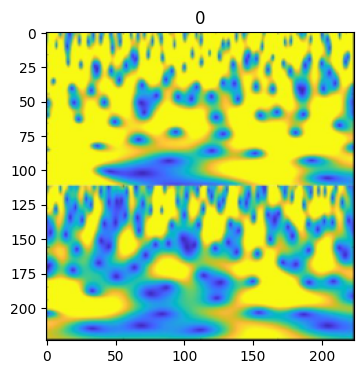

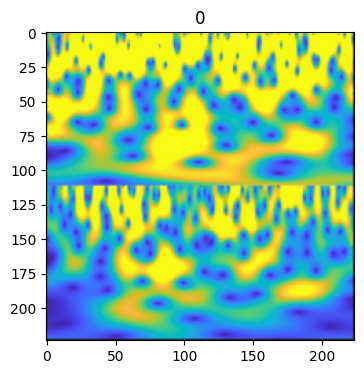

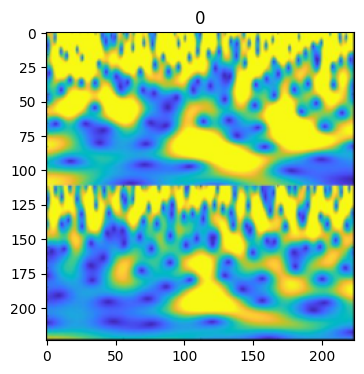

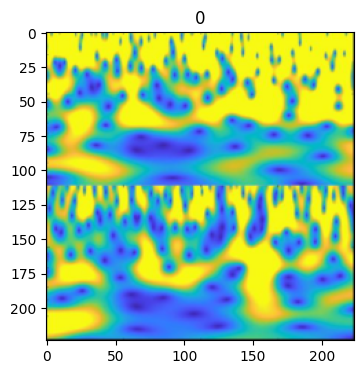

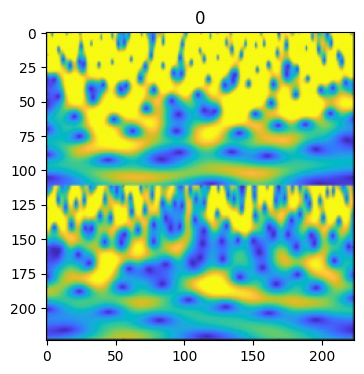

Количество классов:  4


In [6]:
for i in range(5):
  image, label = train_dataset.__getitem__(i)
  imshow(image, title=label)

print('Количество классов: ', len(train_dataset.classes))

In [21]:
test_dataset.__getitem__(1)[0].shape

torch.Size([3, 224, 224])



*   Создание загрузчиков данных



In [7]:
num_epochs = 5
batch_size = 32
learning_rate = 0.001

# Тренировочный data loader

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

# Валидационный data loader

#valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=1)

# Тестовый data loader

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=1)



*   Загружаем предобученную модель и меняем выходной слой под количество наших классов



In [8]:
model = torchvision.models.resnet50(pretrained=True)

model.fc =torch.nn.Linear(
        in_features=2048,
        out_features=4
    )

print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 



*   Определяем функцию ошибок и параметры оптимизатора



In [9]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

NameError: ignored



*   Функция обучения


In [10]:
def train(model, optimizer, loss_function, max_epochs = 2):

  losses = []
  scores = []

  device = 'cpu'

  for epoch in range(max_epochs):
      model.train()
      for it, (X_batch, y_batch) in enumerate(train_loader):
          X = X_batch.to(device)
          y = y_batch.to(device)

          logits = model(X)

          optimizer.zero_grad()
          loss = loss_function(logits, y)

          loss.backward()
          optimizer.step()

          y_preds = torch.argmax(logits.detach().cpu(), 1)

          X = X.cpu()
          y = y.cpu()

          losses.append(loss.detach().cpu())

          print('loss={} score={}'.format(loss, accuracy_score(y_preds, y_batch)))
      print('epoch ', epoch)
  return losses, scores

In [ ]:
loss = []
score = []

losses1, scores1 = train(model, optimizer, loss_function, max_epochs=num_epochs)

loss.append(losses1)
score.append(scores1)

loss=1.3981494903564453 score=0.09375
loss=1.4806257486343384 score=0.15625
loss=1.3870234489440918 score=0.25
loss=1.3599687814712524 score=0.28125
loss=1.3327401876449585 score=0.3125
loss=1.4776890277862549 score=0.125
loss=1.4494954347610474 score=0.09375
loss=1.428617238998413 score=0.21875
loss=1.493715524673462 score=0.15625
loss=1.4836955070495605 score=0.09375
loss=1.3866498470306396 score=0.28125
loss=1.4394009113311768 score=0.15625
loss=1.3859364986419678 score=0.15625
loss=1.3565990924835205 score=0.21875
loss=1.3928706645965576 score=0.25
loss=1.3976222276687622 score=0.25
loss=1.4216859340667725 score=0.15625


In [11]:
YY_check = []
for i in range(test_dataset.__len__()):
  YY_check.append(test_dataset.__getitem__(i)[1])

In [12]:
@torch.no_grad()
def predict(dataloader, model):
    device = 'cpu'
    model.eval()
    predictions = np.array([])
    for x_batch, _ in dataloader:
        y = model(x_batch.to(device));
        y_pred = torch.argmax(y, 1)
        predictions = np.concatenate((predictions, y_pred.detach().cpu().numpy()), axis=0)
    return predictions.flatten()

In [13]:
YY_pred = predict(test_loader, model)
print(accuracy_score(YY_pred, YY_check))

KeyboardInterrupt: ignored

In [15]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=26821960a33ab0ed47560abff5db5b3de3b3794f48686a51bca768ccf20f3408
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [16]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

In [36]:
target_layers = [model.layer4[-1]]

cam = GradCAM(model=model, target_layers=target_layers)

targets = [ClassifierOutputTarget(0)]



In [37]:
targets

In [ ]:
k = 0

device = 'cpu'

for x_batch, _ in test_loader:
  grayscale_cam = cam(input_tensor=x_batch, targets=targets)
  k += 1
  if k == 1:
    break


In [29]:
image, label = train_dataset.__getitem__(0)

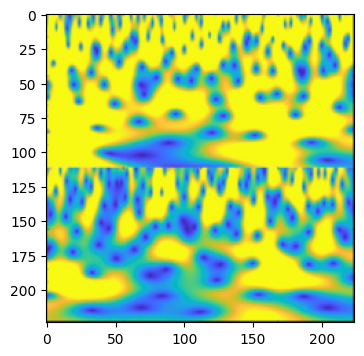

In [30]:
"""Imshow for normalized photos"""
image = image.numpy().transpose((1, 2, 0))

plt.figure(figsize=(5, 4))
plt.imshow(image)

In [31]:

grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(image, grayscale_cam, use_rgb=True)

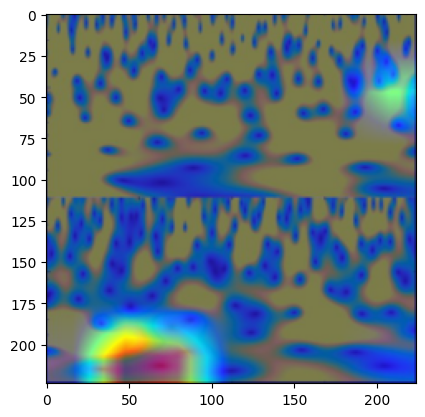

In [33]:
plt.imshow(visualization)

## MNEFLOW

In [ ]:
!pip install mneflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=76eaed57fae7385fe0d2800f378a3805c46749c0c4b0bf0852c22ce87e193ff2
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
import mneflow


epochs.drop_channels({'Fz','FC3','FC1','FCz','FC2','FC4',
                      'C5','C6','CP3','CP1','CPz','CP2',
                      'CP4','P1','Pz','P2','POz'})
print(epochs.info)

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C1, Cz, C2, C4
 chs: 5 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-11-15 12:00:00 UTC
 nchan: 5
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:
epochs.drop_channels({'C1','C2'})

Number of events,288
Events,769: 72770: 72771: 72772: 72
Time range,1.000 – 4.000 s
Baseline,off


In [ ]:
print(epochs.info)

<Info | 8 non-empty values
 bads: []
 ch_names: C3, Cz, C4
 chs: 3 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-11-15 12:00:00 UTC
 nchan: 3
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:
#Specify import options
import_opt = dict(savepath='/content/',  # path where TFR files will be saved
                  out_name='mne_sample_epochs',  # name of TFRecords files
                  fs=250,
                  input_type='trials',
                  target_type='int',
                  picks={'eeg'},
                  scale=True,  # apply baseline_scaling
                  crop_baseline=False,  # remove baseline interval after scaling
                  decimate=None,
                  scale_interval=(0, 60),  # indices in time axis corresponding to baseline interval
                  n_folds=5,  # validation set size set to 20% of all data
                  overwrite=True,
                  segment=False,
                  test_set='holdout')


#write TFRecord files and metadata file to disk
meta = mneflow.produce_tfrecords([epochs], **import_opt)

processing epochs
input shapes: X- (288, 3, 751) targets- (288, 1)
Preprocessing:
Scaling to interval 0.0 - 60.0
Splitting sets
Preprocessed: (288, 1, 751, 3) (288, 4) folds: 6 x 48
288
Prepocessed sample shape: (1, 751, 3)
Target shape actual/metadata:  (4,) (4,)
Saving TFRecord# 0


In [ ]:
dataset = mneflow.Dataset(meta, train_batch=100)

In [ ]:
# specify model parameters
lf_params = dict(n_latent=32, #number of latent factors
                  filter_length=17, #convolutional filter length in time samples
                  nonlin = tf.nn.relu,
                  padding = 'SAME',
                  pooling = 5,#pooling factor
                  stride = 5, #stride parameter for pooling layer
                  pool_type='max',
                  model_path = import_opt['savepath'],
                  dropout = .5,
                  l1_scope = ["weights"],
                  l1=3e-3)

model = mneflow.models.Deep4(dataset, lf_params)
model.build()

tconv1:  (None, 3, 751, 32)
sconv1: (None, 3, 751, 32)
pool1:  (None, 3, 151, 32)
tsconv2: (None, 3, 151, 64)
pool2:  (None, 3, 31, 64)
tsconv3: (None, 3, 31, 128)
pool3:  (None, 3, 7, 128)
tsconv4: (None, 3, 7, 256)
pool4:  (None, 3, 2, 256)
Built: fc input: (None, 3, 2, 256)
Input shape: (1, 751, 3)
y_pred: (None, 4)
Initialization complete!


Epoch 1/10
100/100 - 57s - loss: 17.4255 - cat_ACC: 0.4066 - val_loss: 9.0430 - val_cat_ACC: 0.3243 - 57s/epoch - 574ms/step
Epoch 2/10
100/100 - 57s - loss: 5.7842 - cat_ACC: 0.5916 - val_loss: 4.7016 - val_cat_ACC: 0.2973 - 57s/epoch - 568ms/step
Epoch 3/10
100/100 - 56s - loss: 2.8973 - cat_ACC: 0.8092 - val_loss: 4.2802 - val_cat_ACC: 0.3514 - 56s/epoch - 560ms/step
Epoch 4/10
100/100 - 56s - loss: 1.8063 - cat_ACC: 0.9645 - val_loss: 3.9994 - val_cat_ACC: 0.4054 - 56s/epoch - 558ms/step
Epoch 5/10
100/100 - 57s - loss: 1.2405 - cat_ACC: 1.0000 - val_loss: 3.5916 - val_cat_ACC: 0.4054 - 57s/epoch - 567ms/step
Epoch 6/10
100/100 - 56s - loss: 1.1985 - cat_ACC: 0.9417 - val_loss: 3.6134 - val_cat_ACC: 0.4324 - 56s/epoch - 558ms/step
Epoch 7/10
100/100 - 56s - loss: 0.8035 - cat_ACC: 1.0000 - val_loss: 3.3949 - val_cat_ACC: 0.4054 - 56s/epoch - 563ms/step
Epoch 8/10
100/100 - 56s - loss: 0.6586 - cat_ACC: 0.9990 - val_loss: 3.2189 - val_cat_ACC: 0.3243 - 56s/epoch - 560ms/step
Epoch 9

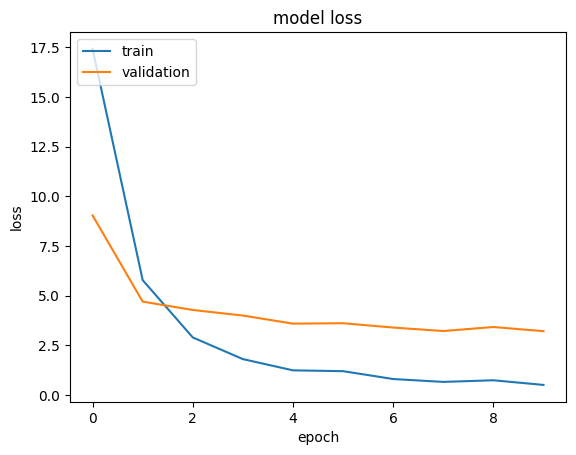

In [ ]:
#train the model for 10 epochs
model.train(n_epochs=10, eval_step=100, early_stopping=5)
model.plot_hist()